This python notebook provides a simple illustration of how to post-process and analyze results that come from runs of the parksim simulator.  This pickle process doesn't have to be the only way that records are created.  I have just implemented it as a first cut to eliminate the need for directly integrating into the simulator code for every application.  The pickle output represents a single run of the simulator with default values, so execution is required to change the behavior.

If it remains practical, adding new content to the pickle output could be a handy way to enable the simulator to generate analysis for a number of different analytical applications.  

Below is an example of reading the output and doing simple visualizations

In [72]:
import pickle

simArchive = pickle.load(open( "/Users/clisle/Dropbox/dataScience/parksim/parksim_records.p", "rb" ) )
guests = simArchive['guests']
venues = simArchive['attractions']

print('there were %5d guests' % len(guests))
print('there were %5d venues to visit' % len(venues))
print()
print('Venue Names and types:')
print('----------------------')
for i in venues:
    print(venues[i]['name'],venues[i]['type'])

there were  3984 guests
there were    15 venues to visit

Venue Names and types:
----------------------
Walt Disney Railroad  ride
Harmony Barber Shop  service
Plaza Restaurant  restaurant
Crystal Palace  restaurant
Swiss Family Treehouse  ride
Magic Carpets of Aladdin  ride
Jungle Cruise  ride
Enchanted Tiki Room  ride
Pirates of the Caribbean  ride
Sunshine Tree Terrace  restaurant
Splash Mountain  ride
Big Thunder Mountain Railroad  ride
Haunted Mansion  ride
Hall of Presidents  ride
Space Mountain  ride


In [73]:
import pandas as pd

vizdata = []
for guest in guests:
    record = guests[guest]
    #print(event)
    vizdata.append({'name':record['name'],'wait':record['waittime'],'reneges':record['reneges']})
guest_summary = pd.DataFrame(vizdata)

In [74]:
guest_summary

,name,reneges,wait
0,Customer000000,51,4829.629514
1,Customer000001,6,357.610308
2,Customer000002,8,592.481016
3,Customer000003,9,571.712226
4,Customer000004,14,984.710901
5,Customer000005,8,645.357696
6,Customer000006,12,873.715447
7,Customer000007,10,647.953653
8,Customer000008,13,806.114625
9,Customer000009,17,1050.538357


**how long did guests wait during the visit:**

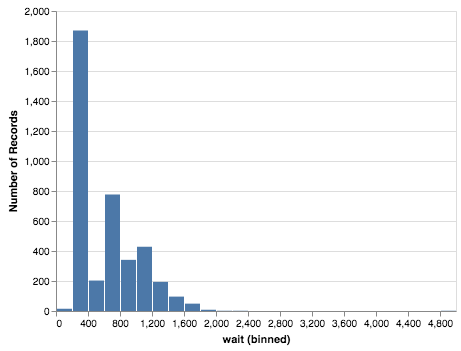

In [75]:
import altair as alt
from vega_datasets import data

data = guest_summary

alt.Chart(data).mark_bar().encode(
    alt.X("wait:Q", bin=alt.Bin(maxbins=25)),
    y='count()',
)

**How often did the guests give up waiting?**

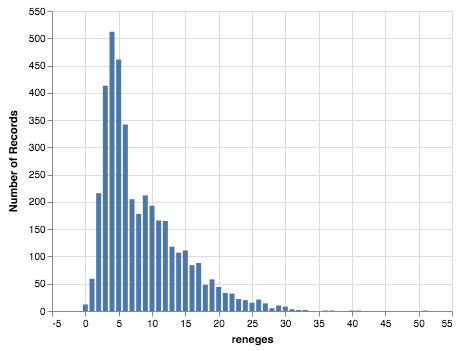

In [76]:

alt.Chart(data).mark_bar().encode(
    alt.X("reneges:Q"),
    y='count()',
)

In [77]:
import pandas as pd

vizdata = []
for event in venues['Space Mountain']['events']:
    #print(event)
    vizdata.append({'type':event[0],'time':event[1],'queuelength':event[2]})
space_mountain_events = pd.DataFrame(vizdata)

Oh no, it looks like the queue length was longer than 1160 visitors multiple times during the day:

In [78]:
space_mountain_events[space_mountain_events.queuelength> 1160]

,queuelength,time,type
1925,1161,67.077091,release
1927,1161,67.277391,request
1928,1162,67.285076,request
1929,1163,67.529645,request
1930,1163,67.596852,release
1931,1163,67.622806,release
1932,1161,67.640502,release
1933,1161,67.685254,request
1934,1162,67.739899,request
1935,1163,67.757354,request


It is easier to see the results graphically, so lets count up the times that the queue reached length 900 and bin this according to the time of the day to see how the flow changed throughout the day

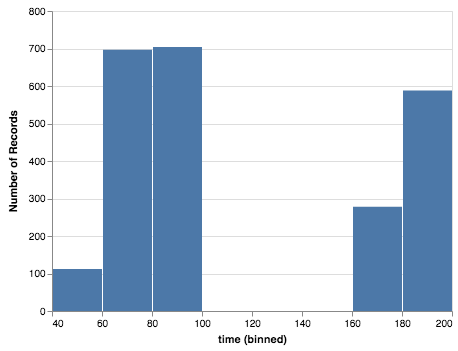

In [79]:
import altair as alt
from vega_datasets import data

data = space_mountain_events[space_mountain_events.queuelength> 900]

alt.Chart(data).mark_bar().encode(
    alt.X("time:Q", bin=True),
    y='count()',
)

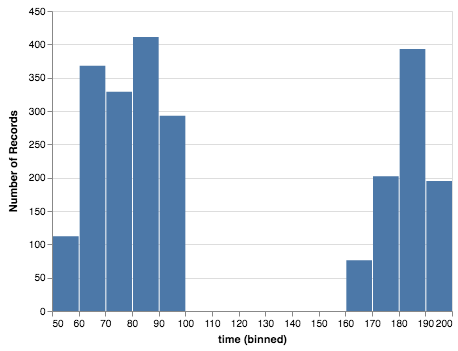

In [80]:
# so there were a few peak in the beginning of the day.  Pass a bin() object to 
# have finer control over the number of bins

alt.Chart(data).mark_bar().encode(
    alt.X("time:Q", bin=alt.Bin(maxbins=25)),
    y='count()'
)


Altair rendering is limited to 5000 items (because it stores data in the python notebook and can get large).  So lets thin our measurements by randomly sampling 4000 times from the venue dataset to get the queue length at a reasonable number of time points

In [81]:
data = space_mountain_events[['time','queuelength']]
smalldata = space_mountain_events.sample(n=4000)
smalldata

,queuelength,time,type
7171,875,199.454963,release
12873,444,385.020423,release
5963,901,169.278642,release
15999,81,563.878999,request
13217,411,399.992777,release
678,386,40.480344,request
12813,451,382.696318,release
9304,716,255.602337,request
9592,698,263.024976,release
15150,250,503.786338,request


Now we need to sort the values according to time again, since we randomly sampled above.  Then render them to see what the queuelength looked like during the day, organized by time

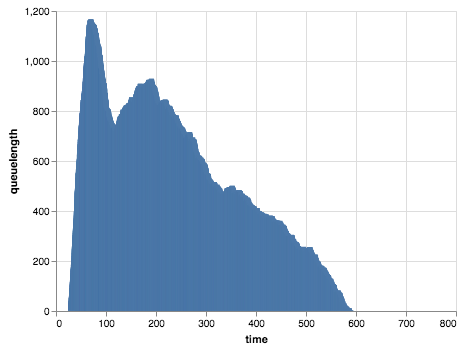

In [83]:
sorted_lengths = smalldata.sort_values(by=['time'])
alt.Chart(sorted_lengths).mark_bar().encode(
    x="time:Q",
    y='queuelength:Q',
)


In [84]:
sorted_lengths

,queuelength,time,type
1,0,25.953364,release
5,0,27.510625,request
2,0,27.510625,request
14,0,27.704861,request
15,0,27.704861,request
24,0,27.897945,request
27,0,28.038422,release
35,0,28.130295,request
33,0,28.130295,request
37,0,28.130295,request
